In [1]:
from matplotlib import pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd
import os

In [2]:
#creating dataframes from csv files
city_data = "city_data.csv"
ride_data = "ride_data.csv"

city_data_df = pd.read_csv(city_data, encoding="iso-8859-1", low_memory=False)
ride_data_df = pd.read_csv(ride_data, encoding="iso-8859-1", low_memory=False)

#city_data_df.head()
#ride_data_df.head()

combined_uber_df = pd.merge(city_data_df, ride_data_df, on = 'city', how="outer").groupby(["city"],
                                                         as_index=True)
combined_piechart_df = pd.merge(city_data_df, ride_data_df, on = 'city', how="outer").groupby(["type"],
                                                         as_index=True)

combined_piechart2_df = pd.merge(city_data_df, ride_data_df, on = 'city', how="outer")
combined_piechart2_df = combined_piechart2_df.groupby(["type", "city"]).sum()
combined_piechart3_df = combined_piechart2_df.groupby(["type"]).sum()

#combined_piechart3_df.head(50)

#print(combined_uber_df.dtypes)

In [3]:
#groupby_city = combined_uber_df.groupby(['city'])

In [4]:
average_fare = combined_uber_df["fare"].mean()
print (average_fare)

city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [5]:
total_number_rides = combined_uber_df["city"].count()
print(total_number_rides)


city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [6]:
total_drivers = combined_uber_df["driver_count"].mean()
print(total_drivers)


city
Alvarezhaven            21
Alyssaberg              67
Anitamouth              16
Antoniomouth            21
Aprilchester            49
Arnoldview              41
Campbellport            26
Carrollbury              4
Carrollfort             55
Clarkstad               21
Conwaymouth             18
Davidtown               73
Davistown               25
East Cherylfurt          9
East Douglas            12
East Erin               43
East Jenniferchester    22
East Leslie              9
East Stephen             6
East Troybury            3
Edwardsbury             11
Erikport                 3
Eriktown                15
Floresberg               7
Fosterside              69
Hernandezshire          10
Horneland                8
Jacksonfort              6
Jacobfort               52
Jasonfort               25
                        ..
South Roy               35
South Shannonborough     9
Spencertown             68
Stevensport              6
Stewartview             49
Swansonbury            

In [7]:
city_type = combined_uber_df["type"].unique()
print(city_type)
len(city_type)

city
Alvarezhaven               [Urban]
Alyssaberg                 [Urban]
Anitamouth              [Suburban]
Antoniomouth               [Urban]
Aprilchester               [Urban]
Arnoldview                 [Urban]
Campbellport            [Suburban]
Carrollbury             [Suburban]
Carrollfort                [Urban]
Clarkstad               [Suburban]
Conwaymouth             [Suburban]
Davidtown                  [Urban]
Davistown                  [Urban]
East Cherylfurt         [Suburban]
East Douglas               [Urban]
East Erin                  [Urban]
East Jenniferchester    [Suburban]
East Leslie                [Rural]
East Stephen               [Rural]
East Troybury              [Rural]
Edwardsbury                [Urban]
Erikport                   [Rural]
Eriktown                   [Urban]
Floresberg              [Suburban]
Fosterside                 [Urban]
Hernandezshire             [Rural]
Horneland                  [Rural]
Jacksonfort                [Rural]
Jacobfort      

125

In [8]:
new_df = pd.DataFrame({"Rides Per City":total_number_rides, "Average Fare":average_fare, "Number of Drivers":total_drivers, "city type":city_type})
print(new_df)

                      Average Fare  Number of Drivers  Rides Per City  \
city                                                                    
Alvarezhaven             23.928710                 21              31   
Alyssaberg               20.609615                 67              26   
Anitamouth               37.315556                 16               9   
Antoniomouth             23.625000                 21              22   
Aprilchester             21.981579                 49              19   
Arnoldview               25.106452                 41              31   
Campbellport             33.711333                 26              15   
Carrollbury              36.606000                  4              10   
Carrollfort              25.395517                 55              29   
Clarkstad                31.051667                 21              12   
Conwaymouth              34.591818                 18              11   
Davidtown                22.978095                 

In [9]:
rural_data = new_df[new_df["city type"] == 'Rural']
suburban_data = new_df[new_df["city type"] == 'Suburban']
urban_data = new_df[new_df["city type"] == 'Urban']

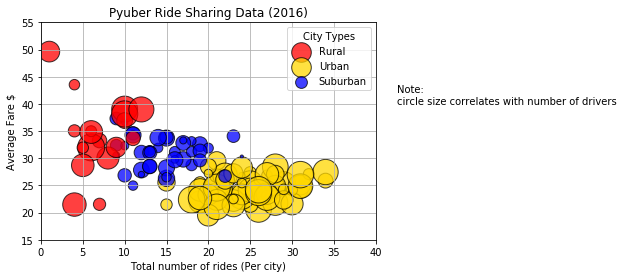

In [15]:
plt.grid()

urban_data_plt = plt.scatter(urban_data['Rides Per City'],urban_data['Average Fare'] , marker="o", facecolors="gold", edgecolors="black", s=urban_data['Number of Drivers']*10, 
             label= 'Urban', alpha=0.75)

suburban_data_plt = plt.scatter(suburban_data['Rides Per City'],suburban_data['Average Fare'] , marker="o", facecolors="blue", edgecolors="black", s=suburban_data['Number of Drivers']*10, 
             label= 'Suburban', alpha=0.75)

rural_data_plt = plt.scatter(rural_data['Rides Per City'],rural_data['Average Fare'] , marker="o", facecolors="red", edgecolors="black", s=urban_data['Number of Drivers']*10, 
             label= 'rural', alpha=0.75)

plt.ylim(15,55)

plt.xlim(0,40)

plt.legend((rural_data_plt,urban_data_plt,suburban_data_plt),("Rural","Urban","Suburban"),title="City Types")

plt.title("Pyuber Ride Sharing Data (2016)")
plt.ylabel("Average Fare $")
plt.xlabel("Total number of rides (Per city)")

plt.annotate("Note: \ncircle size correlates with number of drivers" , xy=(30, 40), xycoords='data',xytext=(42.5, 40),)

plt.show()

In [11]:
fares_label = ["Rural", "Suburban", "Urban"]
colors = ["red","lightskyblue","gold"]
explode = (0,0,0.1)

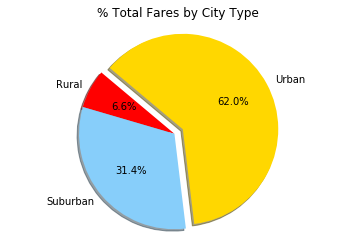

In [12]:
# % of Total Fares by City Type
total_fares = combined_piechart_df["fare"].sum()

plt.pie(total_fares, explode=explode, labels=fares_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% Total Fares by City Type')

plt.axis('equal')

plt.savefig("%fares_type")
plt.show()

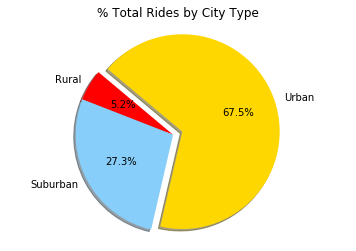

In [13]:
total_count = combined_piechart_df["fare"].count()

plt.pie(total_count, explode=explode, labels=fares_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% Total Rides by City Type')

plt.axis('equal')

plt.savefig("%rides_type")
plt.show()

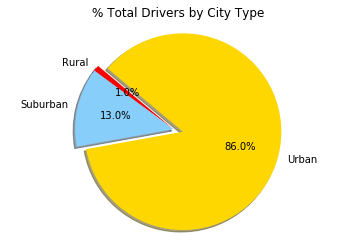

In [14]:
total_drivers = combined_piechart3_df["driver_count"]

plt.pie(total_drivers, explode=explode, labels=fares_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% Total Drivers by City Type')

plt.axis('equal')

plt.savefig("%rides_type")
plt.show()